In [1]:
import numpy as np
import pandas as pd

In [2]:
dtrain = pd.read_csv('datadamin/train.csv')

In [3]:
dtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
dtrain.shape

(8523, 12)

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [6]:
x = dtrain['Item_Outlet_Sales']
xx = x.values.reshape(8523,1)
discretizer.fit(xx)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='kmeans')

In [7]:
dis_x = discretizer.transform(xx)

In [9]:
len(dis_x)

8523

In [10]:
dtrain['Item_Outlet_Sales'] = dis_x

In [11]:
dtrain.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,1.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0


In [12]:
cleanup_nums = {"Outlet_Size":     {"Small": 1, "Medium": 2, "High" : 3},
                "Item_Fat_Content": {"Low Fat": 1, "low fat": 1, "Regular": 2, "LF": 1, "reg": 2 },
               "Outlet_Location_Type":{"Tier 1": 1, "Tier 2": 2, "Tier 3": 3},
               "Outlet_Type" : {"Supermarket Type1": 1,"Supermarket Type2": 2,"Supermarket Type3": 3, "Grocery Store" : 4}}

In [13]:
x = dtrain.replace(cleanup_nums, regex=True)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,2.0,1,1,1.0
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,3,2,0.0
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,2.0,1,1,1.0
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,4,0.0
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,3.0,3,1,0.0
5,FDP36,10.395,2,0.000000,Baking Goods,51.4008,OUT018,2009,2.0,3,2,0.0
6,FDO10,13.650,2,0.012741,Snack Foods,57.6588,OUT013,1987,3.0,3,1,0.0
7,FDP10,NaN,1,0.127470,Snack Foods,107.7622,OUT027,1985,2.0,3,3,1.0
8,FDH17,16.200,2,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,2,1,0.0
9,FDU28,19.200,2,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,2,1,2.0


In [14]:
x = x.drop(['Item_Identifier'], axis = 1)
x = x.drop(['Outlet_Identifier'], axis = 1)


In [15]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,Dairy,249.8092,1999,2.0,1,1,1.0
1,5.920,2,0.019278,Soft Drinks,48.2692,2009,2.0,3,2,0.0
2,17.500,1,0.016760,Meat,141.6180,1999,2.0,1,1,1.0
3,19.200,2,0.000000,Fruits and Vegetables,182.0950,1998,NaN,3,4,0.0
4,8.930,1,0.000000,Household,53.8614,1987,3.0,3,1,0.0
5,10.395,2,0.000000,Baking Goods,51.4008,2009,2.0,3,2,0.0
6,13.650,2,0.012741,Snack Foods,57.6588,1987,3.0,3,1,0.0
7,NaN,1,0.127470,Snack Foods,107.7622,1985,2.0,3,3,1.0
8,16.200,2,0.016687,Frozen Foods,96.9726,2002,NaN,2,1,0.0
9,19.200,2,0.094450,Frozen Foods,187.8214,2007,NaN,2,1,2.0


In [16]:
from sklearn.impute import SimpleImputer
imp_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [17]:
a = pd.DataFrame()
a['Item_Weight'] = x['Item_Weight']
a['Item_Visibility'] = x['Item_Visibility']
a['Item_MRP'] = x['Item_MRP']
a['Outlet_Establishment_Year'] = x['Outlet_Establishment_Year']
b = pd.DataFrame()
b['Item_Fat_Content']=x['Item_Fat_Content']
b['Item_Type']=x['Item_Type']
b['Outlet_Size']=x['Outlet_Size']
b['Outlet_Location_Type']=x['Outlet_Location_Type']
b['Outlet_Type']=x['Outlet_Type']
b['Item_Outlet_Sales']=x['Item_Outlet_Sales']
# y = imp_noncat.fit_transform(x['Item_Weight'])

In [18]:
a =imp_noncat.fit_transform(a)

In [19]:
a

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, 1.99900000e+03],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, 2.00900000e+03],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, 1.99900000e+03],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, 2.00400000e+03],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, 2.00900000e+03],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, 1.99700000e+03]])

In [20]:
b =imp_cat.fit_transform(b)

In [21]:
b

array([[1, 'Dairy', 2.0, 1, 1, 1.0],
       [2, 'Soft Drinks', 2.0, 3, 2, 0.0],
       [1, 'Meat', 2.0, 1, 1, 1.0],
       ...,
       [1, 'Health and Hygiene', 1.0, 2, 1, 0.0],
       [2, 'Snack Foods', 2.0, 3, 2, 0.0],
       [1, 'Soft Drinks', 1.0, 1, 1, 0.0]], dtype=object)

In [32]:
repack_data1 = pd.DataFrame(a, columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])
repack_data2 = pd.DataFrame(b, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'])
data_fix = repack_data1.join(repack_data2)

In [33]:
data_fix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,1999.0,1,Dairy,2,1,1,1
1,5.920000,0.019278,48.2692,2009.0,2,Soft Drinks,2,3,2,0
2,17.500000,0.016760,141.6180,1999.0,1,Meat,2,1,1,1
3,19.200000,0.000000,182.0950,1998.0,2,Fruits and Vegetables,2,3,4,0
4,8.930000,0.000000,53.8614,1987.0,1,Household,3,3,1,0
5,10.395000,0.000000,51.4008,2009.0,2,Baking Goods,2,3,2,0
6,13.650000,0.012741,57.6588,1987.0,2,Snack Foods,3,3,1,0
7,12.857645,0.127470,107.7622,1985.0,1,Snack Foods,2,3,3,1
8,16.200000,0.016687,96.9726,2002.0,2,Frozen Foods,2,2,1,0
9,19.200000,0.094450,187.8214,2007.0,2,Frozen Foods,2,2,1,2


In [34]:
item = data_fix['Item_Type']
data_fix = data_fix.drop(['Item_Type'], axis = 1)


In [35]:
dums = pd.DataFrame(pd.get_dummies(item))
dums

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
kelas = data_fix['Item_Outlet_Sales']
data_fix = data_fix.drop(['Item_Outlet_Sales'], axis = 1)

In [37]:
data_fix = data_fix.join(dums)


In [38]:
data_fix['Item_Outlet_Sales'] = kelas

In [39]:
data_fix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Baking Goods,Breads,...,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,1999.0,1,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920000,0.019278,48.2692,2009.0,2,2,3,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,17.500000,0.016760,141.6180,1999.0,1,2,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,19.200000,0.000000,182.0950,1998.0,2,2,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930000,0.000000,53.8614,1987.0,1,3,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,10.395000,0.000000,51.4008,2009.0,2,2,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650000,0.012741,57.6588,1987.0,2,3,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,12.857645,0.127470,107.7622,1985.0,1,2,3,3,0,0,...,0,0,0,0,0,0,1,0,0,1
8,16.200000,0.016687,96.9726,2002.0,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200000,0.094450,187.8214,2007.0,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,2


Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year    float64
Item_Fat_Content              object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Baking Goods                   uint8
Breads                         uint8
Breakfast                      uint8
Canned                         uint8
Dairy                          uint8
Frozen Foods                   uint8
Fruits and Vegetables          uint8
Hard Drinks                    uint8
Health and Hygiene             uint8
Household                      uint8
Meat                           uint8
Others                         uint8
Seafood                        uint8
Snack Foods                    uint8
Soft Drinks                    uint8
Starchy Foods                  uint8
Item_Outlet_Sales             object
dtype: object

In [49]:
X = data_fix.iloc[:,:-1]
Y = data_fix.iloc[:,-1]
Y =Y.astype('int')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)

In [51]:
type(X_train)

pandas.core.frame.DataFrame

In [52]:
type(y_train)

pandas.core.series.Series

In [59]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
asd = clf.fit(X_train, y_train)

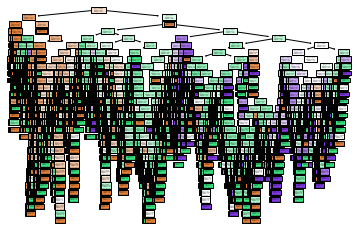

In [60]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(asd, filled=True)
plt.show()


In [54]:
pred = clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
coma = confusion_matrix(y_test, pred)
coma

array([[680, 178,  29],
       [193, 290, 109],
       [ 37,  92,  97]], dtype=int64)

In [56]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,pred, average='weighted')

(0.6232666989839262, 0.6258064516129033, 0.6243158074378535, None)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6258064516129033